# Preyecto ML osteoporosis

<img src="data/Osteoporosis_Knee_X_ray/osteoporosis/OS21.jpg" width="200" style="margin-left: 100px;">


**Osteoporosis:** enfermedad que vuelve los huesos frágiles y más propensos a romperse (fracturarse).

**Osteopenia:** una afección caracterizada por una densidad mineral ósea (DMO) más baja de lo normal, pero no lo suficientemente grave como para ser diagnosticada como osteoporosis.


Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import os

from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img



# Pre-proccessing

Carga de dataset

In [2]:
dataset = keras.utils.image_dataset_from_directory("data/Osteoporosis_Knee_X_ray")

Found 239 files belonging to 3 classes.


Creación de X e y para entrenamiento de modelos

In [3]:
base = "C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc"

lista_rutas = []
target = []

rutas = [
    "data/Osteoporosis_Knee_X_ray/normal",
    "data/Osteoporosis_Knee_X_ray/osteopenia",
    "data/Osteoporosis_Knee_X_ray/osteoporosis"
]

for ruta in rutas:
    ruta_total = os.path.join(base, ruta)

    for foto in os.listdir(ruta_total):
        nuevo_nombre = foto.replace("JPEG", "jpg")

        ruta_foto = os.path.join(ruta_total, foto)
        lista_rutas.append(ruta_foto)

        clase_actual = os.path.basename(ruta_total)
        target.append(clase_actual)

print(lista_rutas)
print(len(lista_rutas))
print("*" * 50)
print(target)
print(len(target))

['C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N1.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N10.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N11.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N12.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N13.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N14.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyec

In [4]:
df = pd.DataFrame({"path_fotos": lista_rutas, "target": target})
df

,path_fotos,target
0,C:\Users\Administrador\Desktop\repositorios_ag...,normal
1,C:\Users\Administrador\Desktop\repositorios_ag...,normal
2,C:\Users\Administrador\Desktop\repositorios_ag...,normal
3,C:\Users\Administrador\Desktop\repositorios_ag...,normal
4,C:\Users\Administrador\Desktop\repositorios_ag...,normal
...,...,...
234,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis
235,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis
236,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis
237,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis


In [5]:
df["target"].value_counts()

target
osteopenia      154
osteoporosis     49
normal           36
Name: count, dtype: int64

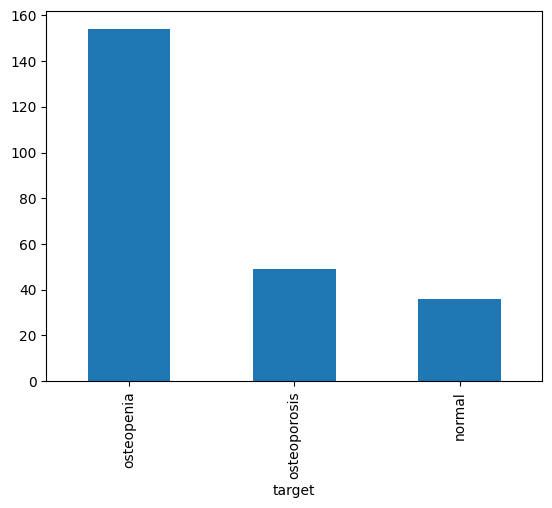

In [6]:
df['target'].value_counts().plot.bar();

In [7]:
lista_fotos_1d = []
lista_fotos_flat = []

for foto in df["path_fotos"]:
    # image = imread(foto)
    img = Image.open(foto).convert("L")
    img_resized = img.resize((64, 64))
    img_array = np.array(img_resized)

    img_array = img_array[..., np.newaxis]
    img_flat = img_array.flatten()

    lista_fotos_1d.append(img_array)
    lista_fotos_flat.append(img_flat)

print(lista_fotos_1d)
print(len(lista_fotos_1d))
print("_" * 50)
print(lista_fotos_flat)
print(len(lista_fotos_flat))

[array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], shape=(64, 64, 1), dtype=uint8), array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0

# Modelos Supervisados

In [8]:
# Primera matriz fila 50
lista_fotos_1d[0][50]

array([[  3],
       [ 48],
       [ 87],
       [121],
       [139],
       [149],
       [148],
       [142],
       [157],
       [190],
       [160],
       [121],
       [156],
       [193],
       [169],
       [162],
       [178],
       [154],
       [101],
       [100],
       [ 99],
       [ 94],
       [ 85],
       [ 76],
       [ 61],
       [ 38],
       [ 22],
       [  0],
       [  1],
       [ 27],
       [ 43],
       [ 64],
       [ 81],
       [ 90],
       [ 96],
       [102],
       [104],
       [104],
       [ 98],
       [117],
       [183],
       [166],
       [165],
       [187],
       [192],
       [138],
       [173],
       [195],
       [153],
       [147],
       [152],
       [146],
       [128],
       [ 91],
       [ 45],
       [  3],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

**lista_fotos_flat:** imágenes sin dimensionalidad espacial donde cada píxel se trata como un feature independiente.

**lista_fotos_1d:** imágenes en escala de grises con su estructura espacial original (alto × ancho × canales), listas para ser procesadas como tensores 2D/3D (listas de matrices).

In [9]:
X = np.array(lista_fotos_flat)
X.shape

(239, 4096)

In [10]:
y = df["target"]
y

0            normal
1            normal
2            normal
3            normal
4            normal
           ...     
234    osteoporosis
235    osteoporosis
236    osteoporosis
237    osteoporosis
238    osteoporosis
Name: target, Length: 239, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(215, 4096)
(215,)
(24, 4096)
(24,)


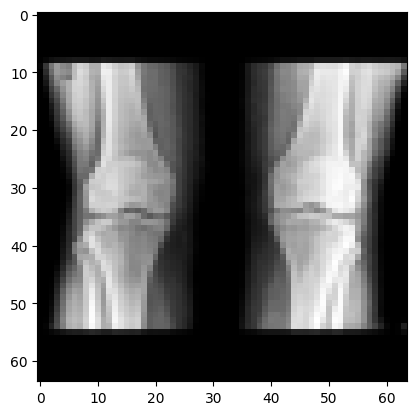

In [12]:
plt.imshow(X_train[0].reshape(64, 64), cmap='gray')
plt.show()

## RandomForest

In [13]:
rf = RandomForestClassifier(
    random_state=11,
    class_weight='balanced',
    n_jobs=-1
)

parametros = {
    "n_estimators": [100, 300, 500],        
    "max_depth": [None, 10, 20],  
    # sqrt: Usa la raíz cuadrada del número total de features    
    # #log₂(número_de_features) - ejemplo: log₂(16) = 4      
    "max_features": ["sqrt", "log2"],       
    "max_leaf_nodes": [None, 20]           
}

grid = GridSearchCV(
    rf,
    param_grid=parametros,
    cv=3,                
    scoring="accuracy", 
    verbose=3
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.611 total time=   0.3s
[CV 2/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.653 total time=   0.3s
[CV 3/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.549 total time=   0.3s
[CV 1/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=300;, score=0.611 total time=   0.9s
[CV 2/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=300;, score=0.653 total time=   1.0s
[CV 3/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=300;, score=0.606 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=500;, score=0.611 total time=   2.1s
[CV 2/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=500;, score=0.653 total

In [14]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    max_features='log2',
    class_weight='balanced', # correción del desbalanceo de clases
    max_leaf_nodes=None,
    random_state=11,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

y_pred_proba = rf_model.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Accuracy: ", round(acc, 4))
print("AUC: ", round(auc, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred))



Accuracy:  0.5833
AUC:  0.6414
Confusion matrix:  [[ 0  3  0]
 [ 0 14  3]
 [ 0  4  0]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

      normal       0.00      0.00      0.00         3
  osteopenia       0.67      0.82      0.74        17
osteoporosis       0.00      0.00      0.00         4

    accuracy                           0.58        24
   macro avg       0.22      0.27      0.25        24
weighted avg       0.47      0.58      0.52        24



c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

<Axes: >

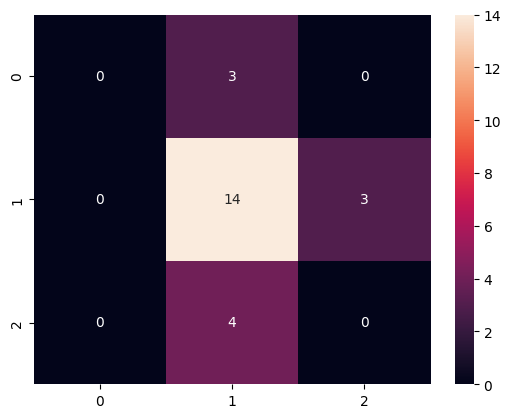

In [15]:
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot=True)

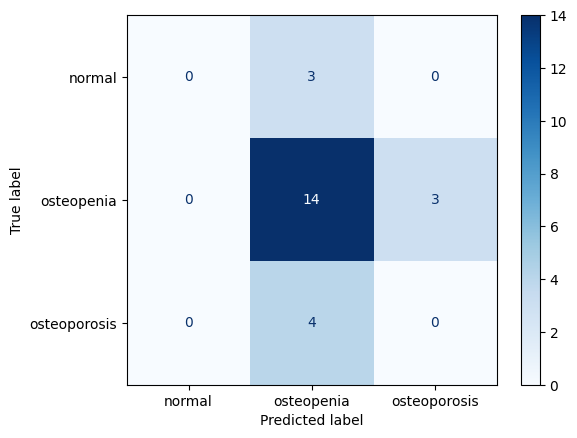

In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal", "osteopenia", "osteoporosis"])
disp.plot(cmap='Blues')

## KNN

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

y_pred_proba_knn = knn_model.predict_proba(X_test)

auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')

print("Accuracy: ", round(acc_knn, 4))
print("AUC: ", round(auc_knn, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred_knn))


Accuracy:  0.5833
AUC:  0.4586
Confusion matrix:  [[ 0  3  0]
 [ 1 13  3]
 [ 0  3  1]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

      normal       0.00      0.00      0.00         3
  osteopenia       0.68      0.76      0.72        17
osteoporosis       0.25      0.25      0.25         4

    accuracy                           0.58        24
   macro avg       0.31      0.34      0.32        24
weighted avg       0.53      0.58      0.55        24



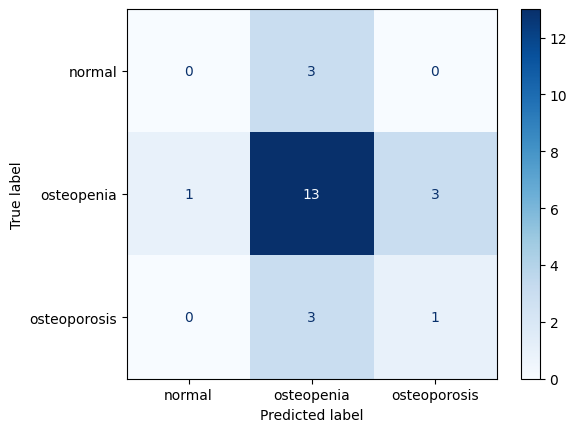

In [18]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["normal", "osteopenia", "osteoporosis"])
disp.plot(cmap='Blues')

In [19]:
knn = KNeighborsClassifier()

parametros = {
    "n_neighbors": np.arange(1, 21, 2),  
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2]         
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=parametros,
    cv=3,                 
    scoring="accuracy",
    verbose=3,
    n_jobs=-1            
)

grid_knn.fit(X_train, y_train)

print("Mejores parámetros:", grid_knn.best_params_)
print("Mejor accuracy:", grid_knn.best_score_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': np.int64(15), 'p': 1, 'weights': 'uniform'}
Mejor accuracy: 0.6372587376108503


In [20]:
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean", p=1, weights="distance")

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

y_pred_proba_knn = knn_model.predict_proba(X_test)

auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')

print("Accuracy: ", round(acc_knn, 4))
print("AUC: ", round(auc_knn, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred_knn))


Accuracy:  0.6667
AUC:  0.4903
Confusion matrix:  [[ 0  3  0]
 [ 0 15  2]
 [ 0  3  1]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

      normal       0.00      0.00      0.00         3
  osteopenia       0.71      0.88      0.79        17
osteoporosis       0.33      0.25      0.29         4

    accuracy                           0.67        24
   macro avg       0.35      0.38      0.36        24
weighted avg       0.56      0.67      0.61        24



c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

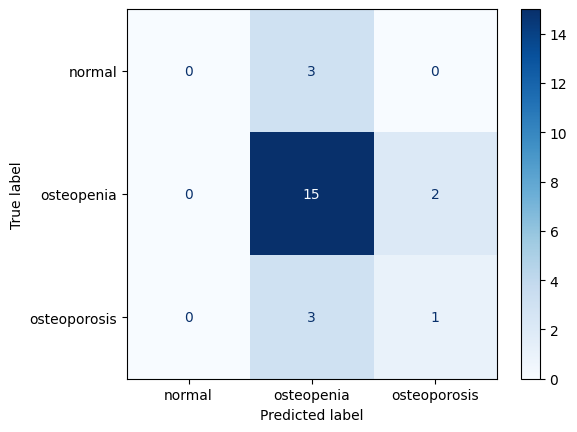

In [21]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["normal", "osteopenia", "osteoporosis"])
disp.plot(cmap='Blues')

# Modelos No Supervisados

In [22]:
X_rn = np.array(lista_fotos_1d)
X_rn.shape

(239, 64, 64, 1)

In [23]:
# Normalización de y con One Hot Encoder
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(df[["target"]]).toarray()

y_encoded


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [24]:
y_rn = y_encoded
y_rn

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_rn, y_rn, test_size=0.1, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(215, 64, 64, 1)
(215, 3)
(24, 64, 64, 1)
(24, 3)


C:\Users\Administrador\AppData\Local\Temp\ipykernel_20896\2801916547.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


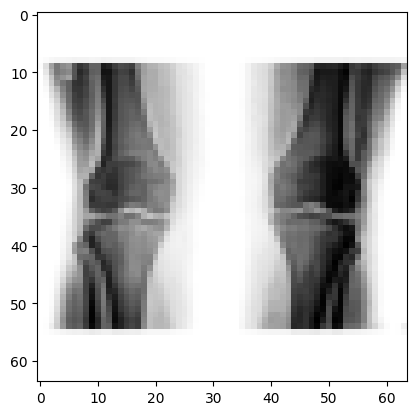

In [26]:
plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

### Normalización de los datos

In [27]:
np.max(X_train)

np.uint8(255)

In [28]:
np.min(X_train)

np.uint8(0)

In [29]:
# Normalización de X
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [30]:
np.max(X_train)

np.float32(1.0)

In [31]:
np.min(X_train)

np.float32(0.0)

In [32]:
np.mean(X_train)

np.float32(0.24058014)

In [33]:
# Normalización de y
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [34]:
X_val = X_train[-24:]
y_val = y_train[-24:]

X_train = X_train[:-24]
y_train = y_train[:-24]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(191, 64, 64, 1)
(24, 64, 64, 1)
(24, 64, 64, 1)


In [35]:
256*256

65536

In [36]:
X_train.shape

(191, 64, 64, 1)

## Redes neuronales

In [37]:
model = keras.models.Sequential()

# Capa entrada se aplana de una dimension a una, va a tener 784 neuronas (una para cada pixel) 28x28
# cada pixel es como el feature de un dataset
model.add(keras.layers.Flatten(input_shape=(64, 64)))

# Hidden layer
model.add(keras.layers.Dense(units = 32,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 16,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 3,
                            activation='softmax'))

c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = [keras.metrics.CategoricalAccuracy()]
)


In [39]:
# Summary: devuelve la red neuronal que se ha creado
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,683 (514.39 KB)

 Trainable params: 131,683 (514.39 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Entrenamiento
history = model.fit(
    X_train,
    y_train,
    # cuántas muestras se usan para calcular un paso de entrenamiento antes de actualizar los pesos.
    batch_size = 16,
    epochs =30,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - categorical_accuracy: 0.5445 - loss: 1.1213 - val_categorical_accuracy: 0.7500 - val_loss: 0.9347
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - categorical_accuracy: 0.6021 - loss: 0.9701 - val_categorical_accuracy: 0.8333 - val_loss: 0.6821
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.6178 - loss: 0.8924 - val_categorical_accuracy: 0.8333 - val_loss: 0.7351
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - categorical_accuracy: 0.6335 - loss: 0.8965 - val_categorical_accuracy: 0.8333 - val_loss: 0.7149
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.6230 - loss: 0.8612 - val_categorical_accuracy: 0.8333 - val_loss: 0.6638
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.6283 - loss: 0.8894 - val_categorical_accuracy: 0.7917 - val_loss: 0.7508
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.6335 - loss: 0.83

In [41]:
df_history = pd.DataFrame(history.history)
df_history

,categorical_accuracy,loss,val_categorical_accuracy,val_loss
0,0.544503,1.121302,0.750000,0.934705
1,0.602094,0.970137,0.833333,0.682104
2,0.617801,0.892405,0.833333,0.735079
3,0.633508,0.896503,0.833333,0.714865
4,0.623037,0.861177,0.833333,0.663802
5,0.628272,0.889402,0.791667,0.750838
6,0.633508,0.838334,0.750000,0.703824
7,0.664921,0.787239,0.833333,0.689827
8,0.659686,0.775539,0.750000,0.762716
9,0.659686,0.769119,0.750000,0.754527


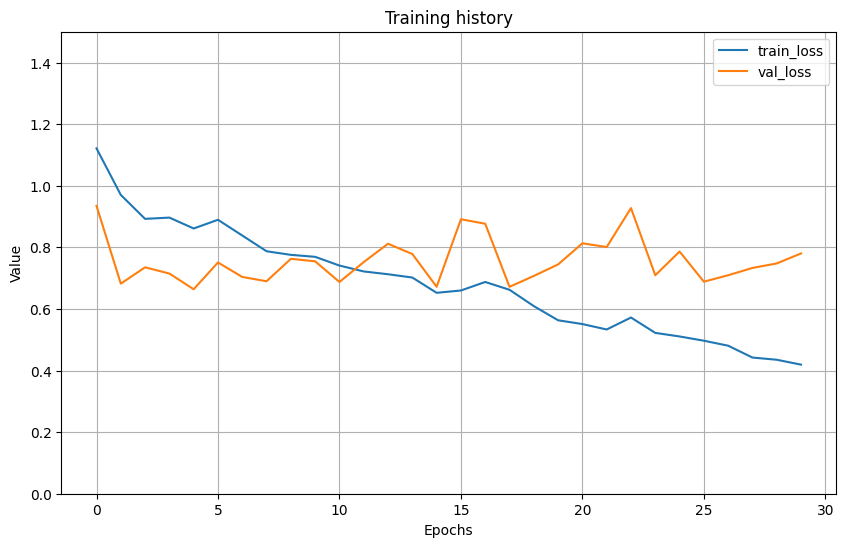

In [42]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
# plt.plot(df_history['categorical_accuracy'], label='train_accuracy')
# plt.plot(df_history['val_categorical_accuracy'], label='val_accuracy')
plt.plot(df_history['loss'], label='train_loss')
plt.plot(df_history['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

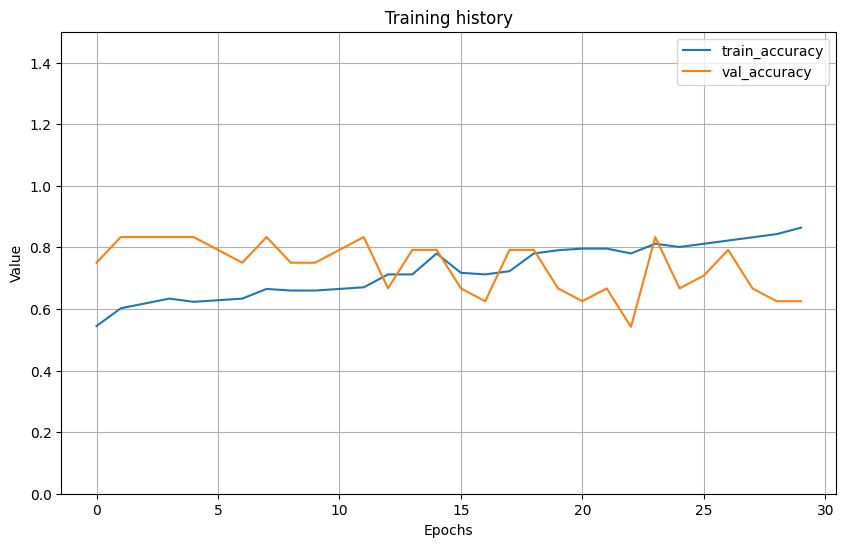

In [43]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
plt.plot(df_history['categorical_accuracy'], label='train_accuracy')
plt.plot(df_history['val_categorical_accuracy'], label='val_accuracy')
# plt.plot(df_history['loss'], label='train_loss')
# plt.plot(df_history['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

In [44]:
results = model.evaluate(X_test, y_test)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - categorical_accuracy: 0.5833 - loss: 0.9514


[0.9513568878173828, 0.5833333134651184]

# CONCLUSIONES

- El modelo DE red neuronal aprende y mejora el accuracy.

- La validación es inestable, variando entre 37% y 83% lo cual se debe a:

    - Tienes muy pocas imágenes.

    - El modelo no generaliza bien todavía.

- No hay un overfitting extremo, pero sí irregularidad en la validación por el dataset pequeño.

## Redes convolucionales + Redes neuronales 

In [45]:
X_train, y_train = shuffle(X_train, y_train, random_state=11)

In [46]:
X_train

array([[[[0.00784314],
         [0.00784314],
         [0.00784314],
         ...,
         [0.        ],
         [0.33333334],
         [0.45490196]],

        [[0.01176471],
         [0.01176471],
         [0.00784314],
         ...,
         [0.        ],
         [0.22352941],
         [0.2901961 ]],

        [[0.01176471],
         [0.01176471],
         [0.00784314],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]]],


       [[[0.00392157],
         [0.00392157],
         [0.00

In [47]:
layers = [

    # Capas convolucionales
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(64,64,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # Capas neuronales
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
]

model_conv_neu = keras.Sequential(layers)

model_conv_neu.compile(optimizer = 'adam',
             loss='categorical_crossentropy',
             metrics=[keras.metrics.CategoricalAccuracy()])

c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model_conv_neu.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,339 (727.89 KB)

 Trainable params: 186,339 (727.89 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Entrenamiento
history_conv_neu = model_conv_neu.fit(
    X_train,
    y_train,
    # cuántas muestras se usan para calcular un paso de entrenamiento antes de actualizar los pesos.
    batch_size = 16,
    epochs =30,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - categorical_accuracy: 0.5550 - loss: 0.9965 - val_categorical_accuracy: 0.8333 - val_loss: 0.6010
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - categorical_accuracy: 0.6126 - loss: 0.9582 - val_categorical_accuracy: 0.8333 - val_loss: 0.9128
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - categorical_accuracy: 0.6126 - loss: 0.9577 - val_categorical_accuracy: 0.8333 - val_loss: 0.6689
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - categorical_accuracy: 0.6126 - loss: 0.9407 - val_categorical_accuracy: 0.8333 - val_loss: 0.7523
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - categorical_accuracy: 0.6126 - loss: 0.9305 - val_categorical_accuracy: 0.8333 - val_loss: 0.7138
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - categorical_accuracy: 0.6126 - loss: 0.9206 - val_categorical_accuracy: 0.8333 - val_loss: 0.6890
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - categorical_accuracy: 0.6126 - los

In [50]:
df_history_conv_neu = pd.DataFrame(history_conv_neu.history)
df_history_conv_neu

,categorical_accuracy,loss,val_categorical_accuracy,val_loss
0,0.554974,0.996537,0.833333,0.601048
1,0.612565,0.958198,0.833333,0.912762
2,0.612565,0.957745,0.833333,0.668873
3,0.612565,0.940730,0.833333,0.752277
4,0.612565,0.930493,0.833333,0.713814
5,0.612565,0.920559,0.833333,0.688978
6,0.612565,0.926043,0.833333,0.663122
7,0.612565,0.909113,0.833333,0.743469
8,0.612565,0.895733,0.833333,0.661277
9,0.612565,0.895319,0.833333,0.715688


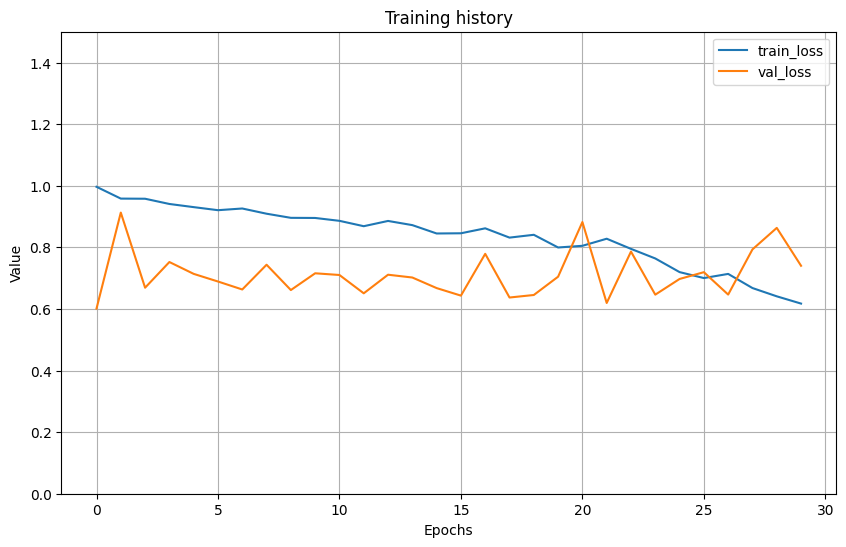

In [51]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
# plt.plot(df_history_conv_neu['categorical_accuracy'], label='train_accuracy')
# plt.plot(df_history_conv_neu['val_categorical_accuracy'], label='val_accuracy')
plt.plot(df_history_conv_neu['loss'], label='train_loss')
plt.plot(df_history_conv_neu['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

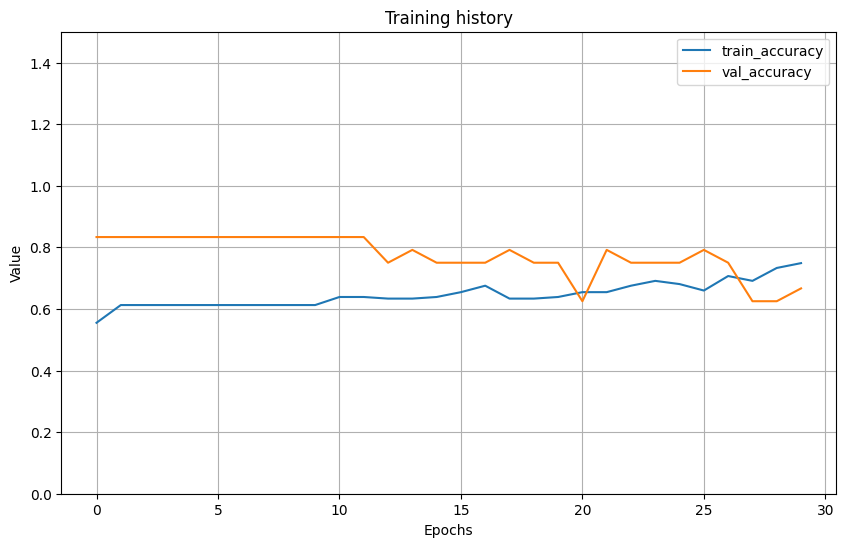

In [52]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
plt.plot(df_history_conv_neu['categorical_accuracy'], label='train_accuracy')
plt.plot(df_history_conv_neu['val_categorical_accuracy'], label='val_accuracy')
# plt.plot(df_history_conv_neu['loss'], label='train_loss')
# plt.plot(df_history_conv_neu['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

# CONCLUSIONES

El modelo ha mejorad con respecto a la red neuronal anterior:

- **Validación más estable**
- **Aprendizaje más coherente**

Aún hay margen de mejora porque:

- El dataset sigue siendo pequeño (239 imágenes)
- Se puede usar **data augmentation** o **transfer learning** para estabilizar y subir la accuracy.


## Redes convolucionales + Redes neuronales + Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.7, 1.3),
    fill_mode='nearest'
)

train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=16
)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(
    X_val, y_val,
    batch_size=16
)

In [55]:
layers_final = [

    # Capas convolucionales
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    # Capas neuronales
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
]

model_conv_neu_final = keras.Sequential(layers_final)

model_conv_neu_final.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=[
        keras.metrics.CategoricalAccuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall()
    ])

c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model_conv_neu_final.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │       401,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,355 (1.60 MB)

 Trainable params: 420,355 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Entrenamiento
history_conv_neu_final = model_conv_neu_final.fit(
    train_generator,
    validation_data=val_generator,
    epochs =30,
)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - categorical_accuracy: 0.5654 - loss: 1.0960 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_categorical_accuracy: 0.0417 - val_loss: 1.1965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - categorical_accuracy: 0.6126 - loss: 1.0897 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_categorical_accuracy: 0.0417 - val_loss: 1.1817 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.6126 - loss: 1.0152 - precision: 0.6383 - recall: 0.1571 - val_categorical_accuracy: 0.8333 - val_loss: 0.7337 - val_precision: 0.8333 - val_recall: 0.8333
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - categorical_accuracy: 0.6126 - loss: 0.9608 - precision: 0.6126 - recall: 0.6126 - val_categorical_accuracy: 0.8333 - val_loss: 0.7013 - val_precision: 0.8333 - val_recall: 0.8333
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━

In [58]:
df_history_conv_neu_final = pd.DataFrame(history_conv_neu_final.history)
df_history_conv_neu_final

,categorical_accuracy,loss,precision,recall,val_categorical_accuracy,val_loss,val_precision,val_recall
0,0.565445,1.095963,0.000000,0.000000,0.041667,1.196548,0.000000,0.000000
1,0.612565,1.089687,0.000000,0.000000,0.041667,1.181689,0.000000,0.000000
2,0.612565,1.015205,0.638298,0.157068,0.833333,0.733713,0.833333,0.833333
3,0.612565,0.960812,0.612565,0.612565,0.833333,0.701287,0.833333,0.833333
4,0.612565,0.953986,0.637500,0.267016,0.833333,0.689638,0.833333,0.833333
5,0.612565,0.937077,0.612565,0.612565,0.833333,0.724893,0.833333,0.833333
6,0.612565,0.940539,0.612565,0.612565,0.833333,0.667023,0.833333,0.833333
7,0.612565,0.933962,0.612565,0.612565,0.833333,0.725471,0.833333,0.833333
8,0.612565,0.932930,0.612565,0.612565,0.833333,0.687087,0.833333,0.833333
9,0.612565,0.934489,0.612565,0.612565,0.833333,0.691648,0.833333,0.833333


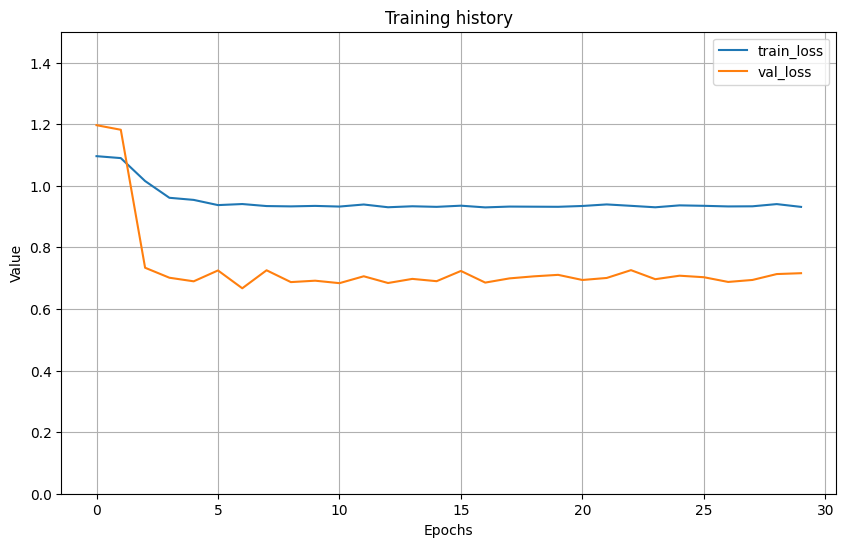

In [59]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
# plt.plot(df_history_conv_neu['categorical_accuracy'], label='train_accuracy')
# plt.plot(df_history_conv_neu['val_categorical_accuracy'], label='val_accuracy')
plt.plot(df_history_conv_neu_final['loss'], label='train_loss')
plt.plot(df_history_conv_neu_final['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

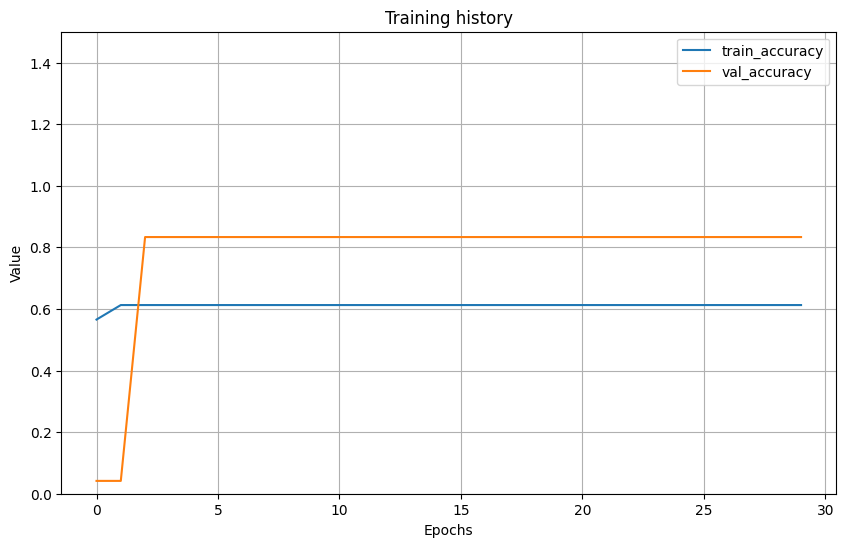

In [60]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
plt.plot(df_history_conv_neu_final['categorical_accuracy'], label='train_accuracy')
plt.plot(df_history_conv_neu_final['val_categorical_accuracy'], label='val_accuracy')
# plt.plot(df_history_conv_neu['loss'], label='train_loss')
# plt.plot(df_history_conv_neu['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

In [61]:
mse_test = model_conv_neu_final.evaluate(X_test, y_test)
print(mse_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 0.7083 - loss: 1.0351 - precision: 0.7083 - recall: 0.7083
[1.0351426601409912, 0.7083333134651184, 0.7083333134651184, 0.7083333134651184]


In [125]:
X_test[:1]

array([[[[0.10588235],
         [0.10980392],
         [0.11372549],
         ...,
         [0.07450981],
         [0.34509805],
         [0.42745098]],

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.09019608],
         [0.27450982],
         [0.32941177]],

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.10588235],
         [0.09019608],
         [0.08235294]],

        ...,

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.10588235],
         [0.10588235],
         [0.10196079]],

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.10588235],
         [0.10588235],
         [0.10196079]],

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.10588235],
         [0.10588235],
         [0.10196079]]]], shape=(1, 64, 64, 1), dtype=float32)

In [133]:
predictions = model_conv_neu_final.predict(X_test[:1])
print(predictions.shape)
np.round(predictions,3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
(1, 3)


array([[0.039, 0.863, 0.098]], dtype=float32)

In [134]:
predictions

array([[0.03935463, 0.8626508 , 0.09799454]], dtype=float32)

In [135]:
predictions.argmax()

np.int64(1)

In [136]:
X_test.shape[0]

24

In [137]:
X_test.shape[0]/32

0.75

In [62]:
model_conv_neu_final.predict(X_test).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

C:\Users\Administrador\AppData\Local\Temp\ipykernel_16648\903806404.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[1].reshape(64,64), cmap=plt.cm.get_cmap('Greys'));


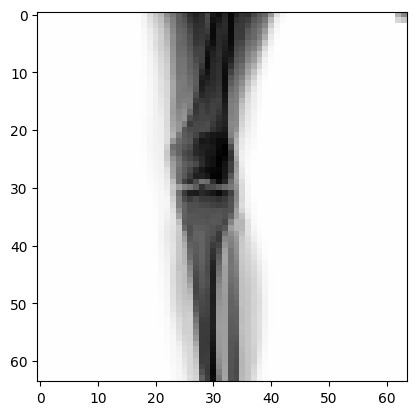

In [141]:
plt.imshow(X_test[1].reshape(64,64), cmap=plt.cm.get_cmap('Greys'));

In [187]:
y_true = y_test.argmax(axis=1)
y_pred = model_conv_neu_final.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
cm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[2, 0, 1],
       [9, 0, 8],
       [3, 0, 1]])

# PASOS A SEGUIR

- Aumentar el número de imágenes mediante usando las que hay (zoom, rotación) para reducir el overfitting y hacer que el modelo generalice mejor.

- Reducir la variabilidad y evitar que memorice el dataset.